In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('Opportunity Wise Data(work data).csv')

In [46]:
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned,Unnamed: 21,Unnamed: 22
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Dhaka,Savar,Bangladesh,1342,...,Not Started,10/3/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,NaN,NaN
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Amritsar,Punjab,Afghanistan,123242,...,Rewards Award,1/5/2023,1/5/2023,200,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10,"[""Critical Thinking"",""Creative Thinking"",""Comm...",NaN,1/5/2023 12:23
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Satna,Madhya Pradesh,India,485001,...,Not Started,10/4/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,NaN,NaN
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Hyderabad,Telangana,India,500039,...,Not Started,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,NaN,NaN
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Bangalore,Karnataka,India,560105,...,Not Started,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,NaN,NaN


In [47]:
df.shape

(20322, 23)

In [48]:
df.columns

Index(['Profile Id', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'Gender', 'City',
       'State', 'Country', 'Zip Code', 'Graduation Date(YYYY MM)',
       'Current Student Status', 'Current/Intended Major',
       'Status Description', 'Apply Date', 'Opportunity Start Date',
       'Reward Amount', 'Badge Id', 'Badge Name', 'Skill Points Earned',
       'Skills Earned', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [49]:
df = df.drop(['Unnamed: 21', 'Unnamed: 22'], axis=1)

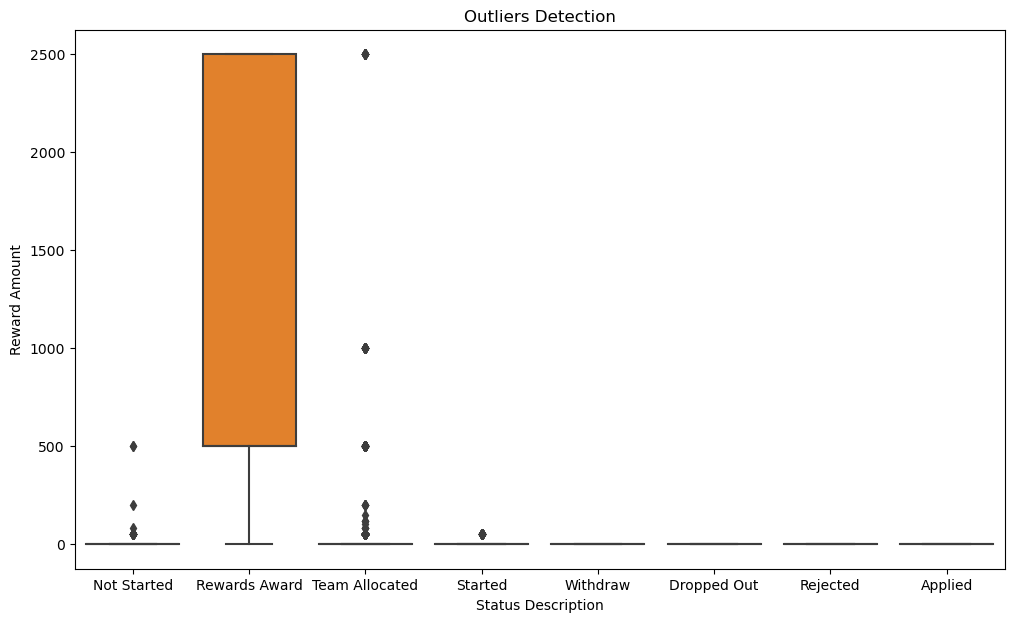

In [50]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='Status Description', y='Reward Amount')
plt.title('Outliers Detection')
plt.show()

In [51]:
df['Status Description'].value_counts()

Team Allocated    14206
Rewards Award      2521
Not Started        1324
Started             810
Rejected            726
Withdraw            622
Applied              89
Dropped Out          24
Name: Status Description, dtype: int64

In [52]:
# # df[(df['Status Description']=='Rejected') & (df['Reward Amount']<1)]
# df = df.drop(df[(df['Status Description'] == 'Rejected')].index)
# df = df.drop(df[(df['Status Description'] == 'Withdraw')].index)
# df = df.drop(df[(df['Status Description'] == 'Applied')].index)
# df = df.drop(df[(df['Status Description'] == 'Dropped Out')].index)

In [53]:
df.shape

(20322, 21)

In [54]:
condition = (df['Status Description'] == 'Team Allocated') & (df['Reward Amount'] > 0)

# Drop rows based on the condition
df = df.drop(df[condition].index)


In [55]:
condition = (df['Status Description'] == 'Not Started') & (df['Reward Amount'] > 0)

# Drop rows based on the condition
df = df.drop(df[condition].index)

In [56]:
condition = (df['Status Description'] == 'Started') & (df['Reward Amount'] > 0)

# Drop rows based on the condition
df = df.drop(df[condition].index)

In [57]:
df.shape

(19934, 21)

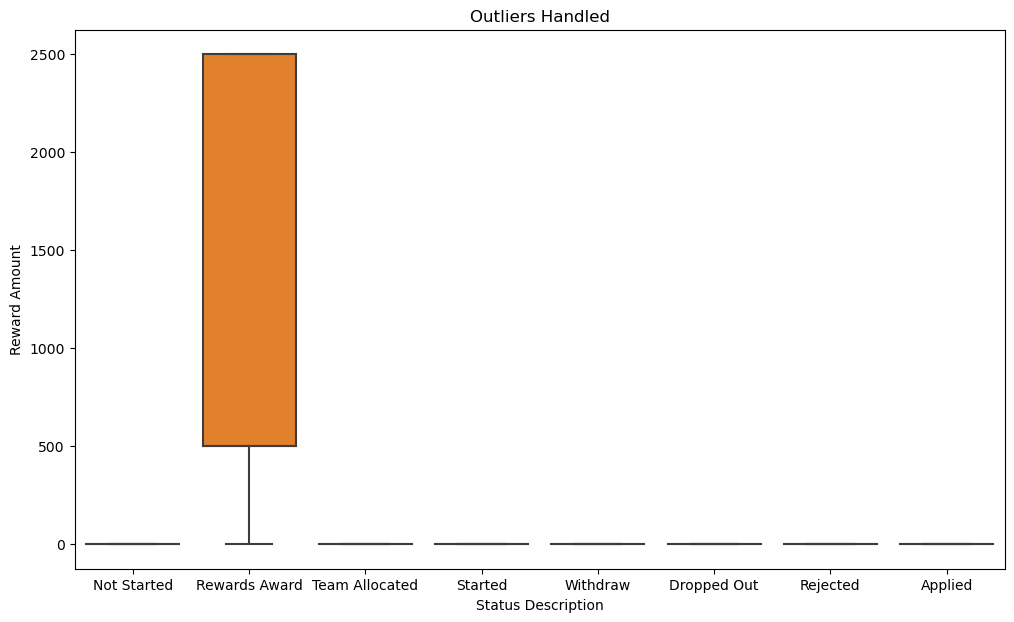

In [58]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='Status Description', y='Reward Amount')
plt.title('Outliers Handled')
plt.show()

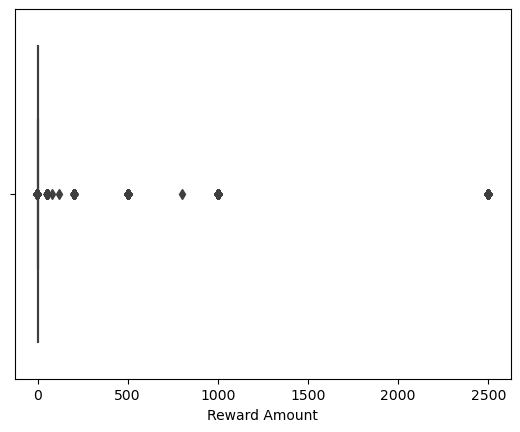

Outlier values:
[ 200   -1 1000  800  500 2500   50  120   80]


In [59]:
data = df['Reward Amount']

# Create a box plot to visualize the distribution and detect outliers
sns.boxplot(x=data)

# Show the plot
plt.show()

# Identify and print the values that are outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Outlier values:")
print(outliers.unique())


In [60]:
print('Unique values in the Reward Amount column')
df['Reward Amount'].unique()

Unique values in the Reward Amount column


array([   0,  200,   -1, 1000,  800,  500, 2500,   50,  120,   80],
      dtype=int64)

In [61]:
print('Value counts of the unique values in the Reward Amount column')
df['Reward Amount'].value_counts()

Value counts of the unique values in the Reward Amount column


 0       16438
-1        1372
 500       805
 2500      693
 1000      436
 200       132
 50         55
 800         1
 120         1
 80          1
Name: Reward Amount, dtype: int64

In [62]:
print('Unique values in the Skill Points Earned column')
df['Skill Points Earned'].unique()


Unique values in the Skill Points Earned column


array([   0,   10,  137,   -1,  267,  534,  454,  403, 1182, 1776,  656,
       1052,  854, 1497, 1708, 1283, 1183, 1117, 1678,  219,  491,  735,
        986,  170,  704,  425,  920,  277,   30,  105,  210,  157,  173],
      dtype=int64)

In [63]:
print('Value counts of the unique values in the Skill Points Earned column')
df['Skill Points Earned'].value_counts()

Value counts of the unique values in the Skill Points Earned column


 0       16041
 1182     1519
-1        1372
 1776      452
 1052      127
 137       113
 1117       72
 854        48
 656        37
 1678       20
 1183       19
 30         17
 920        16
 170        16
 10         13
 219        13
 105         9
 267         6
 277         4
 1497        3
 1708        3
 1283        3
 403         1
 157         1
 210         1
 986         1
 425         1
 704         1
 454         1
 735         1
 491         1
 534         1
 173         1
Name: Skill Points Earned, dtype: int64

In [64]:
df.shape

(19934, 21)

Here are the steps I took for Preprocessing the data:

The "Reward Amount" and "Skill Points Earned" columns are the only numerical columns in the Opportunity wise dataset and they exhibit a range of unique values representing potential reward amounts for participants. The distribution is skewed towards "Reward Amount" and "Skill Points Earned" of 0, with 16,438 instances. Outliers were detected in both datasets using the IQR method. Outliers for the "Reward Amount" column include values such as 200, -1, 1000, 800, 500, 2500, 50, 120, 80, 100, and 150. Notably, it's crucial to highlight that missing values in both columns were replaced with -1 for participants with status descriptions of Withdraw, Dropped Out, and Rejected. This imputation strategy needs to be considered in the interpretation of the reward amounts, and further investigation is recommended to understand the rationale behind this imputation and its potential impact on the analysis. 

Value Counts of Unique Values ("Reward Amount"):
The most common value in the 'Reward Amount' column is 0, occurring 16,438 times. This high count indicates that a significant portion of participants did not receive a cash reward.
The value -1 is recorded 1,372 times, representing instances where participants with 'Withdraw,' 'Dropped Out,' or 'Rejected' status descriptions have missing or unrecorded reward amounts.
Other values such as 500, 2500, and 1000 also appear in varying frequencies, reflecting different reward amounts awarded to participants.

Outliers ("Reward Amount"):
Outliers in the 'Reward Amount' column include higher values like 500, 1000, and 2500. These values might represent exceptional cases where participants received substantial cash rewards.


Value Counts of Unique Values ("Skill Points Earned"):
The value count indicates that 1,372 instances have missing or unrecorded skill points, denoted as -1. This corresponds to participants with 'Withdraw,' 'Dropped Out,' or 'Rejected' status descriptions.
A substantial number of participants (1,519 instances) earned 1,182 skill points, which is the highest count for a specific skill point value.
There is a diverse distribution of skill points, ranging from lower values like 10 to higher values such as 1,776.

Outliers ("Skill Points Earned"):
The distribution of skill points includes outliers, such as participants earning 1,182, 1,776, and other higher values. These outliers might be indicative of exceptional performance or specific achievements during the program.


Before deciding on an approach, it's crucial to understand why certain values are considered outliers. In this case, the skewness and concentration of zero reward amounts need to be taken into account.
Some of the reasons Identified for the cause of the skewness include:

> Skewed Distribution: The presence of a large number of instances with a reward amount of 0 (16,438 instances) can create a skewed distribution. In the context of reward distributions, it's common for a significant proportion of participants to receive no reward, and this may be intentional or reflective of the nature of the opportunities.

> Program Design: The program or opportunities in the dataset might have a design where only a small percentage of participants receive rewards, leading to a concentration of lower values and making higher reward amounts appear as outliers.


I checked for outliers by making a boxplot of the Status Description(X-axis) and the Reward Amount(y-axis) in order to get some context and to avoid removing outliers indiscriminately. I noticed a lot of outliers on for the the categories with Status Description as Not Started, Started and Team Alocated. When I too a closer look at these rows, I found that that participants with Status Description as Not Started, Started and Team Alocated, did not have any Skill Points Earned, Badge and Badge ID recorded, while participants whih Status Description as Reward Awarded, had Skill Points Earned, Badge and Badge ID recorded. so I dropped all outliers in the Not Started, Started and Team Alocated category and this reduced the number of rows in the dataset from 20322 to 19934.

It's essential to balance the need for cleaner data with the desire to retain valuable insights, especially in a platform like Excelerate where the distribution of rewards may be intentional. Transformation techniques, such as logarithmic transformation, can be applied to reduce the impact of extreme values. This allows you to retain the information while mitigating the skewness introduced by outliers.

the method chosen to handle outlier here is scaling. Scaling the data is another potential approach to address the issue of skewed distribution and outliers in the "Reward Amount" column. Scaling techniques aim to standardize or normalize the data, making it more suitable for certain analyses. Applying scaling can help in the following ways:

- Reducing Sensitivity to Outliers: Scaling methods, especially z-score standardization, can reduce the impact of extreme values on the overall distribution.
- Improving Comparisons: Scaling allows for better comparison of values on a standardized scale. This is particularly useful in cases where the magnitude of the values is important.

Two new columns were created for the transformed (Min-Max Scaling) values of the "Reward Amount" and "Skill Points Earned" columns.

For data transformation (creating dummy variables for some categorical variables), I made use of One Hot Encoding.  One-hot encoding is more appropriate for nominal data, where there is no inherent order among the categories. It represents each category with a binary column, indicating its presence or absence.



In [65]:
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'df' is your DataFrame and 'Reward Amount' is the column you want to scale
# Replace 'Reward Amount' with your actual column name if different

# Extract the column to be scaled
reward_amount_column = df['Reward Amount'].values.reshape(-1, 1)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(reward_amount_column)

# Z-Score Standardization
standard_scaler = StandardScaler()
z_score_scaled = standard_scaler.fit_transform(reward_amount_column)

# Create new columns in the DataFrame for scaled values
df['Reward Amount_MinMaxScaled'] = min_max_scaled
df['Reward Amount_ZScoreScaled'] = z_score_scaled

# Print the first few rows of the DataFrame to see the changes
# print(df.head())


In [66]:
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned,Reward Amount_MinMaxScaled,Reward Amount_ZScoreScaled
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Dhaka,Savar,Bangladesh,1342,...,Not Started,10/3/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Amritsar,Punjab,Afghanistan,123242,...,Rewards Award,1/5/2023,1/5/2023,200,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10,"[""Critical Thinking"",""Creative Thinking"",""Comm...",0.080368,0.144290
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Satna,Madhya Pradesh,India,485001,...,Not Started,10/4/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Hyderabad,Telangana,India,500039,...,Not Started,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Bangalore,Karnataka,India,560105,...,Not Started,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452


the method chosen to handle outlier here is scaling. Scaling the data is another potential approach to address the issue of skewed distribution and outliers in the "Reward Amount" column. Scaling techniques aim to standardize or normalize the data, making it more suitable for certain analyses. Applying scaling can help in the following ways:

- Reducing Sensitivity to Outliers: Scaling methods, especially z-score standardization, can reduce the impact of extreme values on the overall distribution.
- Improving Comparisons: Scaling allows for better comparison of values on a standardized scale. This is particularly useful in cases where the magnitude of the values is important.

Two new columns were created for the transformed (Min-Max Scaling) values of the "Reward Amount" and "Skill Points Earned" columns.


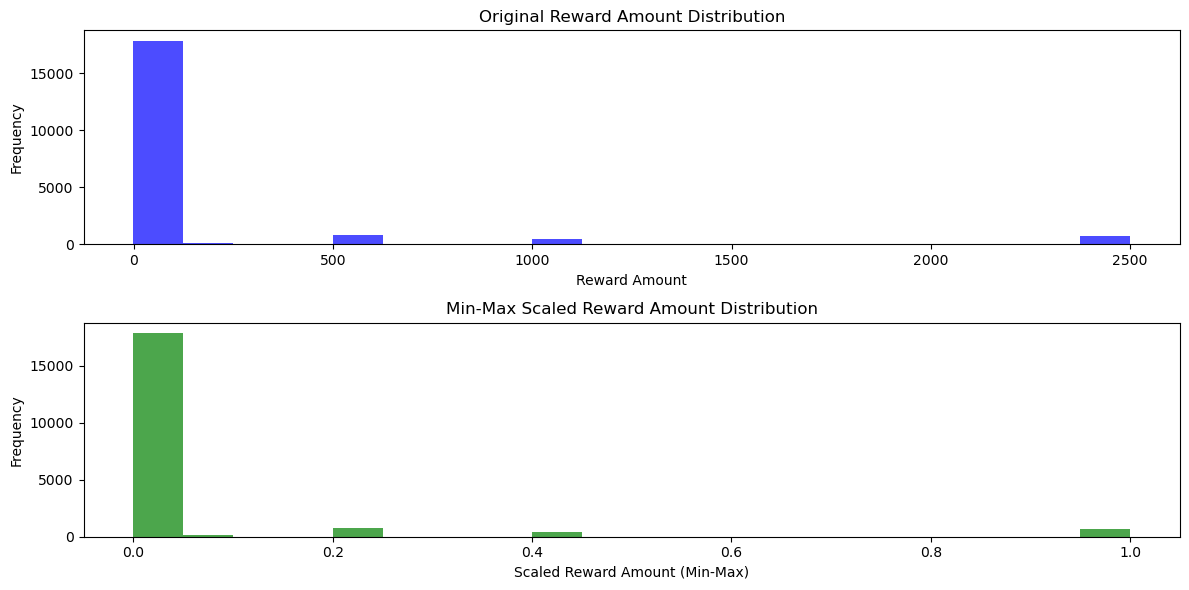

In [67]:
# import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 6))

# Original 'Reward Amount' column
plt.subplot(2, 1, 1)
plt.hist(df['Reward Amount'], bins=20, color='blue', alpha=0.7)
plt.title('Original Reward Amount Distribution')
plt.xlabel('Reward Amount')
plt.ylabel('Frequency')

# Min-Max Scaled 'Reward Amount' column
plt.subplot(2, 1, 2)
plt.hist(df['Reward Amount_MinMaxScaled'], bins=20, color='green', alpha=0.7)
plt.title('Min-Max Scaled Reward Amount Distribution')
plt.xlabel('Scaled Reward Amount (Min-Max)')
plt.ylabel('Frequency')

# # Z-Score Scaled 'Reward Amount' column
# plt.subplot(3, 1, 3)
# plt.hist(df['Reward Amount_ZScoreScaled'], bins=20, color='orange', alpha=0.7)
# plt.title('Z-Score Scaled Reward Amount Distribution')
# plt.xlabel('Scaled Reward Amount (Z-Score)')
# plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


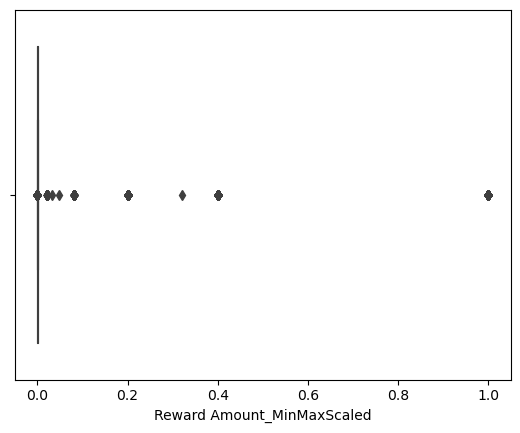

Outlier values:
[0.08036785 0.         0.4002399  0.32027189 0.20031987 1.
 0.02039184 0.04838065 0.03238705]


In [68]:
data = df['Reward Amount_MinMaxScaled']

# Create a box plot to visualize the distribution and detect outliers
sns.boxplot(x=data)

# Show the plot
plt.show()

# Identify and print the values that are outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Outlier values:")
print(outliers.unique())

In [69]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # Assuming 'reward_amounts' is your original column with reward amounts
# original_rewards = df['Reward Amount']

# # Adding 1 to avoid issues with log(0)
# df['Reward_Amount_transformed'] = np.log1p(original_rewards)
# transformed_rewards = np.log1p(original_rewards)

# # Plotting histograms for comparison
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(original_rewards, bins=10, kde=True, color='blue')
# plt.title('Original Reward Amounts Distribution')
# plt.xlabel('Reward Amount')

# plt.subplot(1, 2, 2)
# sns.histplot(transformed_rewards, bins=10, kde=True, color='green')
# plt.title('Log-transformed Reward Amounts Distribution')
# plt.xlabel('Log-transformed Reward Amount')

# plt.show()


In [70]:
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned,Reward Amount_MinMaxScaled,Reward Amount_ZScoreScaled
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Dhaka,Savar,Bangladesh,1342,...,Not Started,10/3/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Amritsar,Punjab,Afghanistan,123242,...,Rewards Award,1/5/2023,1/5/2023,200,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10,"[""Critical Thinking"",""Creative Thinking"",""Comm...",0.080368,0.144290
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Satna,Madhya Pradesh,India,485001,...,Not Started,10/4/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Hyderabad,Telangana,India,500039,...,Not Started,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Bangalore,Karnataka,India,560105,...,Not Started,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452


In [71]:
df.shape

(19934, 23)

### Skill Points Earned

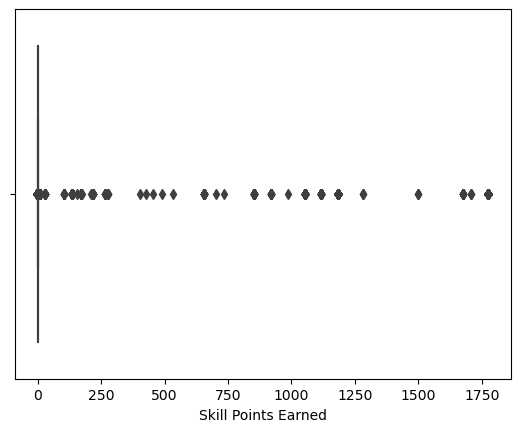

Outlier values:
[  10  137   -1  267  534  454  403 1182 1776  656 1052  854 1497 1708
 1283 1183 1117 1678  219  491  735  986  170  704  425  920  277   30
  105  210  157  173]


In [72]:
data = df['Skill Points Earned']

# Create a box plot to visualize the distribution and detect outliers
sns.boxplot(x=data)

# Show the plot
plt.show()

# Identify and print the values that are outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Outlier values:")
print(outliers.unique())

In [73]:
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming 'df' is your DataFrame and 'Reward Amount' is the column you want to scale
# Replace 'Reward Amount' with your actual column name if different

# Extract the column to be scaled
reward_amount_column = df['Skill Points Earned'].values.reshape(-1, 1)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(reward_amount_column)

# Z-Score Standardization
standard_scaler = StandardScaler()
z_score_scaled = standard_scaler.fit_transform(reward_amount_column)

# Create new columns in the DataFrame for scaled values
df['Skill Points Earned_MinMaxScaled'] = min_max_scaled
# df['Skill Points Earned_ZScoreScaled'] = z_score_scaled

# Print the first few rows of the DataFrame to see the changes
# print(df.head())


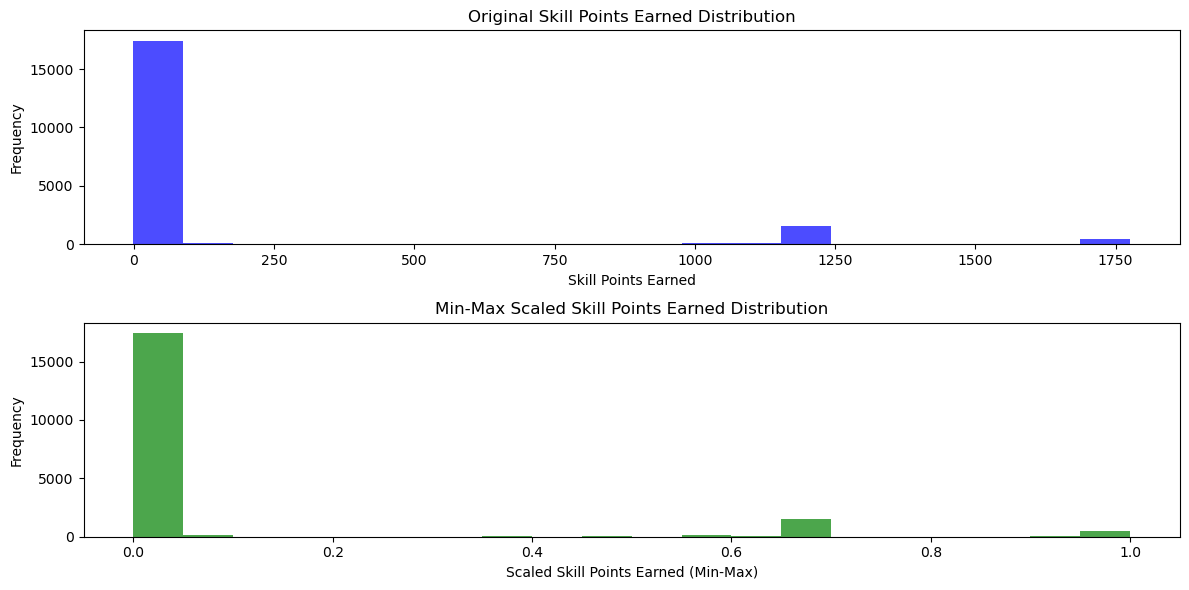

In [74]:
# import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(12, 6))

# Original 'Reward Amount' column
plt.subplot(2, 1, 1)
plt.hist(df['Skill Points Earned'], bins=20, color='blue', alpha=0.7)
plt.title('Original Skill Points Earned Distribution')
plt.xlabel('Skill Points Earned')
plt.ylabel('Frequency')

# Min-Max Scaled 'Reward Amount' column
plt.subplot(2, 1, 2)
plt.hist(df['Skill Points Earned_MinMaxScaled'], bins=20, color='green', alpha=0.7)
plt.title('Min-Max Scaled Skill Points Earned Distribution')
plt.xlabel('Scaled Skill Points Earned (Min-Max)')
plt.ylabel('Frequency')

# # Z-Score Scaled 'Reward Amount' column
# plt.subplot(3, 1, 3)
# plt.hist(df['Skill Points Earned_ZScoreScaled'], bins=20, color='orange', alpha=0.7)
# plt.title('Z-Score Scaled Skill Points Earned Distribution')
# plt.xlabel('Scaled Skill Points Earned (Z-Score)')
# plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [75]:
df.shape

(19934, 24)

In [76]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # Assuming 'Skill Points Earned' is your original column with reward amounts
# original_rewards = df['Skill Points Earned']

# # Adding 1 to avoid issues with log(0)
# df['Skill_Points_Earned_transformed'] = np.log1p(original_rewards)
# transformed_rewards = np.log1p(original_rewards)

# # Plotting histograms for comparison
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(original_rewards, bins=10, kde=True, color='blue')
# plt.title('Original Skill Points Earned Distribution')
# plt.xlabel('Skill Points Earned')

# plt.subplot(1, 2, 2)
# sns.histplot(transformed_rewards, bins=10, kde=True, color='green')
# plt.title('Log-transformed Skill Points Earned Distribution')
# plt.xlabel('Log-transformed Skill Points Earned')

# plt.show()


In [77]:
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned,Reward Amount_MinMaxScaled,Reward Amount_ZScoreScaled,Skill Points Earned_MinMaxScaled
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Dhaka,Savar,Bangladesh,1342,...,10/3/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452,0.000563
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Amritsar,Punjab,Afghanistan,123242,...,1/5/2023,1/5/2023,200,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10,"[""Critical Thinking"",""Creative Thinking"",""Comm...",0.080368,0.144290,0.006190
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Female,Satna,Madhya Pradesh,India,485001,...,10/4/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452,0.000563
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Hyderabad,Telangana,India,500039,...,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452,0.000563
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,1/5/2023,Male,Bangalore,Karnataka,India,560105,...,10/5/2022,1/5/2023,0,Unknown,Unknown,0,Unknown,0.000400,-0.270452,0.000563


## Transformation

For data transformation (creating dummy variables for some categorical variables), I made use of Label Encoder.  Label Encoder is a tool that helps convert categorical data, which consists of labels or names, into numerical values. It's like giving a unique numeric ID to each category in your dataset.

Label Encoder works by ordering the unique values in the categorical colunm, and assigns integer dummy values to them starting from 0 to n_class-1.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19934 entries, 0 to 20321
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Profile Id                        19934 non-null  object 
 1   Opportunity Id                    19934 non-null  object 
 2   Opportunity Name                  19934 non-null  object 
 3   Opportunity Category              19934 non-null  object 
 4   Opportunity End Date              19934 non-null  object 
 5   Gender                            19934 non-null  object 
 6   City                              19934 non-null  object 
 7   State                             19934 non-null  object 
 8   Country                           19934 non-null  object 
 9   Zip Code                          19934 non-null  object 
 10  Graduation Date(YYYY MM)          19934 non-null  object 
 11  Current Student Status            19934 non-null  object 
 12  Curr

In [79]:
df.columns

Index(['Profile Id', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'Gender', 'City',
       'State', 'Country', 'Zip Code', 'Graduation Date(YYYY MM)',
       'Current Student Status', 'Current/Intended Major',
       'Status Description', 'Apply Date', 'Opportunity Start Date',
       'Reward Amount', 'Badge Id', 'Badge Name', 'Skill Points Earned',
       'Skills Earned', 'Reward Amount_MinMaxScaled',
       'Reward Amount_ZScoreScaled', 'Skill Points Earned_MinMaxScaled'],
      dtype='object')

In [80]:
df.shape

(19934, 24)

In [81]:
# import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = df[['Gender', 'Status Description', 'Current Student Status', 'Opportunity Category']]

# Get value counts for each categorical column
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"\nValue counts for {column}:\n{value_counts}")

    # Use OneHotEncoder to encode categories
    one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first column to avoid multicollinearity
    encoded_columns = pd.DataFrame(one_hot_encoder.fit_transform(df[[column]]), columns=one_hot_encoder.get_feature_names_out([column]))

    # Concatenate the encoded columns to the DataFrame and drop the original column
    df = pd.concat([df, encoded_columns], axis=1)
    df.drop([column], axis=1, inplace=True)

# Display the updated DataFrame
print("\nOne-Hot Encoded DataFrame:")
df.head()



Value counts for Gender:
Male                     12033
Female                    7826
Don't want to specify       60
Other                       15
Name: Gender, dtype: int64

Value counts for Status Description:
Team Allocated    13896
Rewards Award      2521
Not Started        1291
Started             765
Rejected            726
Withdraw            622
Applied              89
Dropped Out          24
Name: Status Description, dtype: int64

Value counts for Current Student Status:
Graduate Program Student    9145
Undergraduate Student       6854
Not in Education            2815
High School Student         1119
Unknown                        1
Name: Current Student Status, dtype: int64


C:\Users\SHOPINVERSE\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\SHOPINVERSE\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Value counts for Opportunity Category:
Internship     15233
Event           1921
Course          1630
Competition     1046
Engagement       104
Name: Opportunity Category, dtype: int64

One-Hot Encoded DataFrame:


C:\Users\SHOPINVERSE\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\SHOPINVERSE\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Profile Id,Opportunity Id,Opportunity Name,Opportunity End Date,City,State,Country,Zip Code,Graduation Date(YYYY MM),Current/Intended Major,...,Current Student Status_High School Student,Current Student Status_Not in Education,Current Student Status_Undergraduate Student,Current Student Status_Unknown,Current Student Status_nan,Opportunity Category_Course,Opportunity Category_Engagement,Opportunity Category_Event,Opportunity Category_Internship,Opportunity Category_nan
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Dhaka,Savar,Bangladesh,1342,2023-06,Data Science,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Amritsar,Punjab,Afghanistan,123242,2021-01,Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Satna,Madhya Pradesh,India,485001,2023-04,Computer Science And Engineering,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Hyderabad,Telangana,India,500039,2024-12,Computer Science,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Bangalore,Karnataka,India,560105,2022-06,Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# for column in categorical_columns:
#     value_counts = df[column].value_counts()
#     print(f"\nValue counts for {column}:\n{value_counts}")

In [85]:
condition = (df['Status Description'] == 'Team Allocated') & (df['Reward Amount'] > 0)
condition

KeyError: 'Status Description'

In [43]:
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity End Date,City,State,Country,Zip Code,Graduation Date(YYYY MM),Current/Intended Major,...,Current Student Status_High School Student,Current Student Status_Not in Education,Current Student Status_Undergraduate Student,Current Student Status_Unknown,Current Student Status_nan,Opportunity Category_Course,Opportunity Category_Engagement,Opportunity Category_Event,Opportunity Category_Internship,Opportunity Category_nan
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Dhaka,Savar,Bangladesh,1342,2023-06,Data Science,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Amritsar,Punjab,Afghanistan,123242,2021-01,Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Satna,Madhya Pradesh,India,485001,2023-04,Computer Science And Engineering,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Hyderabad,Telangana,India,500039,2024-12,Computer Science,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,1/5/2023,Bangalore,Karnataka,India,560105,2022-06,Unknown,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
df.to_csv('Opportunity Wise Data(work data-Transformed).csv', index=False)

In [87]:
df.columns

Index(['Profile Id', 'Opportunity Id', 'Opportunity Name',
       'Opportunity End Date', 'City', 'State', 'Country', 'Zip Code',
       'Graduation Date(YYYY MM)', 'Current/Intended Major', 'Apply Date',
       'Opportunity Start Date', 'Reward Amount', 'Badge Id', 'Badge Name',
       'Skill Points Earned', 'Skills Earned', 'Reward Amount_MinMaxScaled',
       'Reward Amount_ZScoreScaled', 'Skill Points Earned_MinMaxScaled',
       'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Status Description_Dropped Out', 'Status Description_Not Started',
       'Status Description_Rejected', 'Status Description_Rewards Award',
       'Status Description_Started', 'Status Description_Team Allocated',
       'Status Description_Withdraw', 'Status Description_nan',
       'Current Student Status_High School Student',
       'Current Student Status_Not in Education',
       'Current Student Status_Undergraduate Student',
       'Current Student Status_Unknown', 'Current Student Status_nan'